In [1]:
#%% Import modules
import numpy as np
import matplotlib.pyplot as plt
from nets_predict.classes.hmm import HiddenMarkovModelClass
from nets_predict.classes.partial_correlation import PartialCorrelationClass
import pickle

HMMClass = HiddenMarkovModelClass()
PartialCorrClass = PartialCorrelationClass()


/users/win-fmrib-analysis/psz102/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set parameters for script
n_chunk = 12
n_ICs = 25
n_edge = int((n_ICs * (n_ICs - 1))/2)
n_states = 8

In [3]:
# set project directories
proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/nets_project/nets_predict'
load_dir = f"{proj_dir}/results/ICA_{n_ICs}/edge_prediction/{n_chunk}_chunks/combined"

# decide which featured to examine
feature_prediction_dict = dict()
feature_prediction_dict['actual'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_actual.npz")
feature_prediction_dict['static'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_static_states_0_model_mean_True.npz")
feature_prediction_dict['fc'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_fc_states_{n_states}_model_mean_True.npz")
feature_prediction_dict['pc'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_pc_states_{n_states}_model_mean_True.npz")
feature_prediction_dict['all'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_all_states_{n_states}_model_mean_True.npz")
feature_prediction_dict['means'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_means_states_{n_states}_model_mean_True.npz")
feature_prediction_dict['tpms_ss'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_states_{n_states}_model_mean_True.npz")
feature_prediction_dict['tpms_ss_only'] = np.load(f"{load_dir}/edge_prediction_all_nm_icov_pm_icov_chunks_{n_chunk}_features_used_tpms_ss_only_states_{n_states}_model_mean_True.npz")

# if you want to examine the dictionary
# for key, value in feature_prediction_dict.items():
#     print(key)
#     print(value['accuracy_per_edge'].shape)
#     # 'actual' doesn't have a prediction since we are using the actual edges and not running predictions
#     if key not in ['actual']:    
#         print(value['predict_y'].shape)
    
# print(*feature_prediction_dict['static']) 

In [4]:
# load hmm features
proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/nets_project/nets_predict'
#dynamic_dir = f"{proj_dir}/results/ICA_{n_ICs}/dynamic/run01_states08_DD000010_model_mean_True/{n_chunk}_chunks"
dynamic_dir = f"{proj_dir}/results/ICA_{n_ICs}/dynamic/run01_states08_DD000010_model_mean_True/1_chunks"
with open(f'{dynamic_dir}/hmm_features_{n_chunk}_chunks.pickle', 'rb') as file:
    hmm_features_list = pickle.load(file)

# 'hmm_features_list' is a list of length n_chunks, where each chunk is described by a dictionary of features, including:
# fo_chunk, lt_chunk, intv_chunk, sr_chunk, means_chunk, covs_chunk, trans_prob_chunk, icovs_chunk

In [5]:
# first we store the data we want to work STD and normalize (optional)
fo_all, lt_all, sr_all, intv_all, means_all, covs_all, trans_prob_all, icovs_all = HMMClass.organise_hmm_features_across_chunks(hmm_features_list)

normalize = 1
if normalize == 1:
    fo_all, lt_all, sr_all, intv_all, means_all, covs_all, trans_prob_all, icovs_all = HMMClass.normalize_hmm_features(fo_all, lt_all, sr_all, intv_all, means_all, covs_all, trans_prob_all, icovs_all)

In [6]:
# get means fo standard deivation across (1) chunks of time; (2) subjects
fo_std_across_chunks, lt_std_across_chunks, sr_std_across_chunks, intv_std_across_chunks, means_std_across_chunks, covs_std_across_chunks, trans_prob_std_across_chunks, icovs_std_across_chunks = HMMClass.get_std_across_chunks(fo_all, lt_all, sr_all, intv_all, means_all, covs_all, trans_prob_all, icovs_all)
fo_std_across_subs, lt_std_across_subs, sr_std_across_subs, intv_std_across_subs, means_std_across_subs, covs_std_across_subs, trans_prob_std_across_subs, icovs_std_across_subs = HMMClass.get_std_across_subs(fo_all, lt_all, sr_all, intv_all, means_all, covs_all, trans_prob_all, icovs_all )
fo_std_mean_chunks, lt_std_mean_chunks, sr_std_mean_chunks, intv_std_mean_chunks, means_std_mean_chunks, covs_std_mean_chunks, trans_prob_std_mean_chunks, icovs_std_mean_chunks = HMMClass.get_mean_std_chunks(fo_std_across_chunks, lt_std_across_chunks, sr_std_across_chunks, intv_std_across_chunks, means_std_across_chunks, covs_std_across_chunks, trans_prob_std_across_chunks, icovs_std_across_chunks)
fo_std_mean_subs, lt_std_mean_subs, sr_std_mean_subs, intv_std_mean_subs, means_std_mean_subs, covs_std_mean_subs, trans_prob_std_mean_subs, icovs_std_mean_subs = HMMClass.get_mean_std_subs(fo_std_across_subs, lt_std_across_subs, sr_std_across_subs, intv_std_across_subs, means_std_across_subs, covs_std_across_subs, trans_prob_std_across_subs, icovs_std_across_subs)

In [7]:
means_std_mean_subs_flatten = means_std_mean_subs.flatten()
# might want to keep diag for covs?
covs_std_mean_subs_flatten = PartialCorrClass.extract_upper_off_main_diag(covs_std_mean_subs).flatten()
trans_prob_std_mean_subs_flatten = trans_prob_std_mean_subs.flatten()
icovs_std_mean_subs_flatten = PartialCorrClass.extract_upper_off_main_diag(icovs_std_mean_subs).flatten()

means_std_mean_chunks_flatten = means_std_mean_chunks.flatten()
# might want to keep diag for covs?
covs_std_mean_chunks_flatten = PartialCorrClass.extract_upper_off_main_diag(covs_std_mean_chunks).flatten()
trans_prob_std_mean_chunks_flatten = trans_prob_std_mean_chunks.flatten()
icovs_std_mean_chunks_flatten = PartialCorrClass.extract_upper_off_main_diag(icovs_std_mean_chunks).flatten()


In [8]:
print(np.nanmax(fo_std_mean_chunks))
print(np.nanmax(lt_std_mean_chunks))
print(np.nanmax(sr_std_mean_chunks))
print(np.nanmax(intv_std_mean_chunks))
print(np.nanmax(means_std_mean_chunks_flatten))
print(np.nanmax(covs_std_mean_chunks_flatten))
print(np.nanmax(trans_prob_std_mean_chunks_flatten))
print(np.nanmax(icovs_std_mean_chunks_flatten))

print(np.nanmin(fo_std_mean_chunks))
print(np.nanmin(lt_std_mean_chunks))
print(np.nanmin(sr_std_mean_chunks))
print(np.nanmin(intv_std_mean_chunks))
print(np.nanmin(means_std_mean_chunks_flatten))
print(np.nanmin(covs_std_mean_chunks_flatten))
print(np.nanmin(trans_prob_std_mean_chunks_flatten))
print(np.nanmin(icovs_std_mean_chunks_flatten))

0.11141749565027532
0.018350192381187187
0.1527137076201752
0.11562717632639295
0.060741334905005134
0.023554389010949105
0.336911003746401
0.07847731831176218
0.043591100391394924
0.007414312346514195
0.07183541858717847
0.062065743911498404
0.01574981386154329
0.002670419327769387
0.011621100692773207
0.04300354415577435


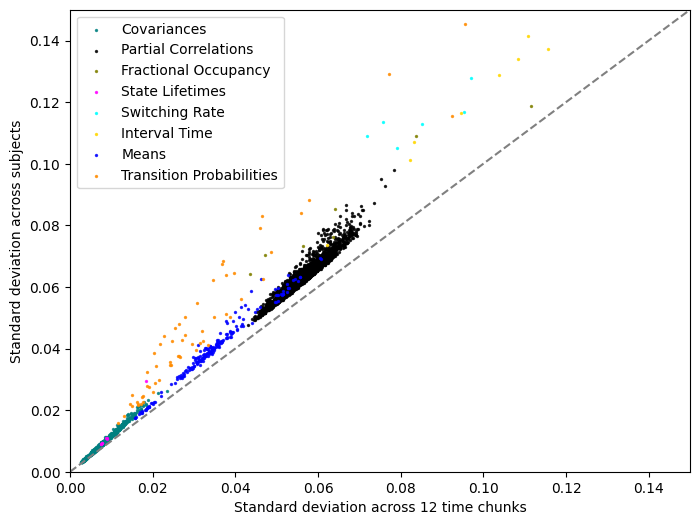

In [9]:
# Define colors and labels for each category
colors = ['teal', 'black', 'olive', 'magenta', 'cyan', 'gold', 'blue', 'darkorange']
labels = ['Covariances', 'Partial Correlations', 'Fractional Occupancy', 'State Lifetimes', 'Switching Rate', 'Interval Time','Means', 'Transition Probabilities', ]

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot each category separately
for chunks, subs, color, label in zip(
        [covs_std_mean_chunks_flatten, icovs_std_mean_chunks_flatten, fo_std_mean_chunks, lt_std_mean_chunks, sr_std_mean_chunks, intv_std_mean_chunks, means_std_mean_chunks_flatten, trans_prob_std_mean_chunks_flatten],
        [covs_std_mean_subs_flatten, icovs_std_mean_subs_flatten, fo_std_mean_subs, lt_std_mean_subs, sr_std_mean_subs, intv_std_mean_subs, means_std_mean_subs_flatten, trans_prob_std_mean_subs_flatten],
        colors, labels):
    
    plt.scatter(chunks, subs, color=color, alpha=0.8, s=2, label=label)

# Add black lines on x and y axes
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0

# Set plot title and labels
plt.xlabel(f"Standard deviation across {n_chunk} time chunks")
plt.ylabel('Standard deviation across subjects')

# Add y=x line
plt.plot(np.linspace(0, 0.2, 100), np.linspace(0, 0.2, 100), color='grey', linestyle='--')

plt.xlim(0, 0.15)
plt.ylim(0, 0.15)

# Hide the grid
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [10]:
print(covs_std_mean_chunks.shape)
print(covs_std_mean_subs.shape)

print(covs_std_mean_chunks_flatten.shape)
print(covs_std_mean_subs_flatten.shape)

print(np.max(covs_std_mean_chunks))
print(np.min(covs_std_mean_chunks))
print(np.max(covs_std_mean_chunks) - np.min(covs_std_mean_chunks))
print(np.max(covs_std_mean_subs))
print(np.min(covs_std_mean_subs))
print(np.max(covs_std_mean_subs) - np.min(covs_std_mean_subs))

(8, 25, 25)
(8, 25, 25)
(2400,)
(2400,)
0.03264474863919957
0.002670419327769387
0.02997432931143018
0.03554797881348046
0.0030362291158532156
0.03251174969762724


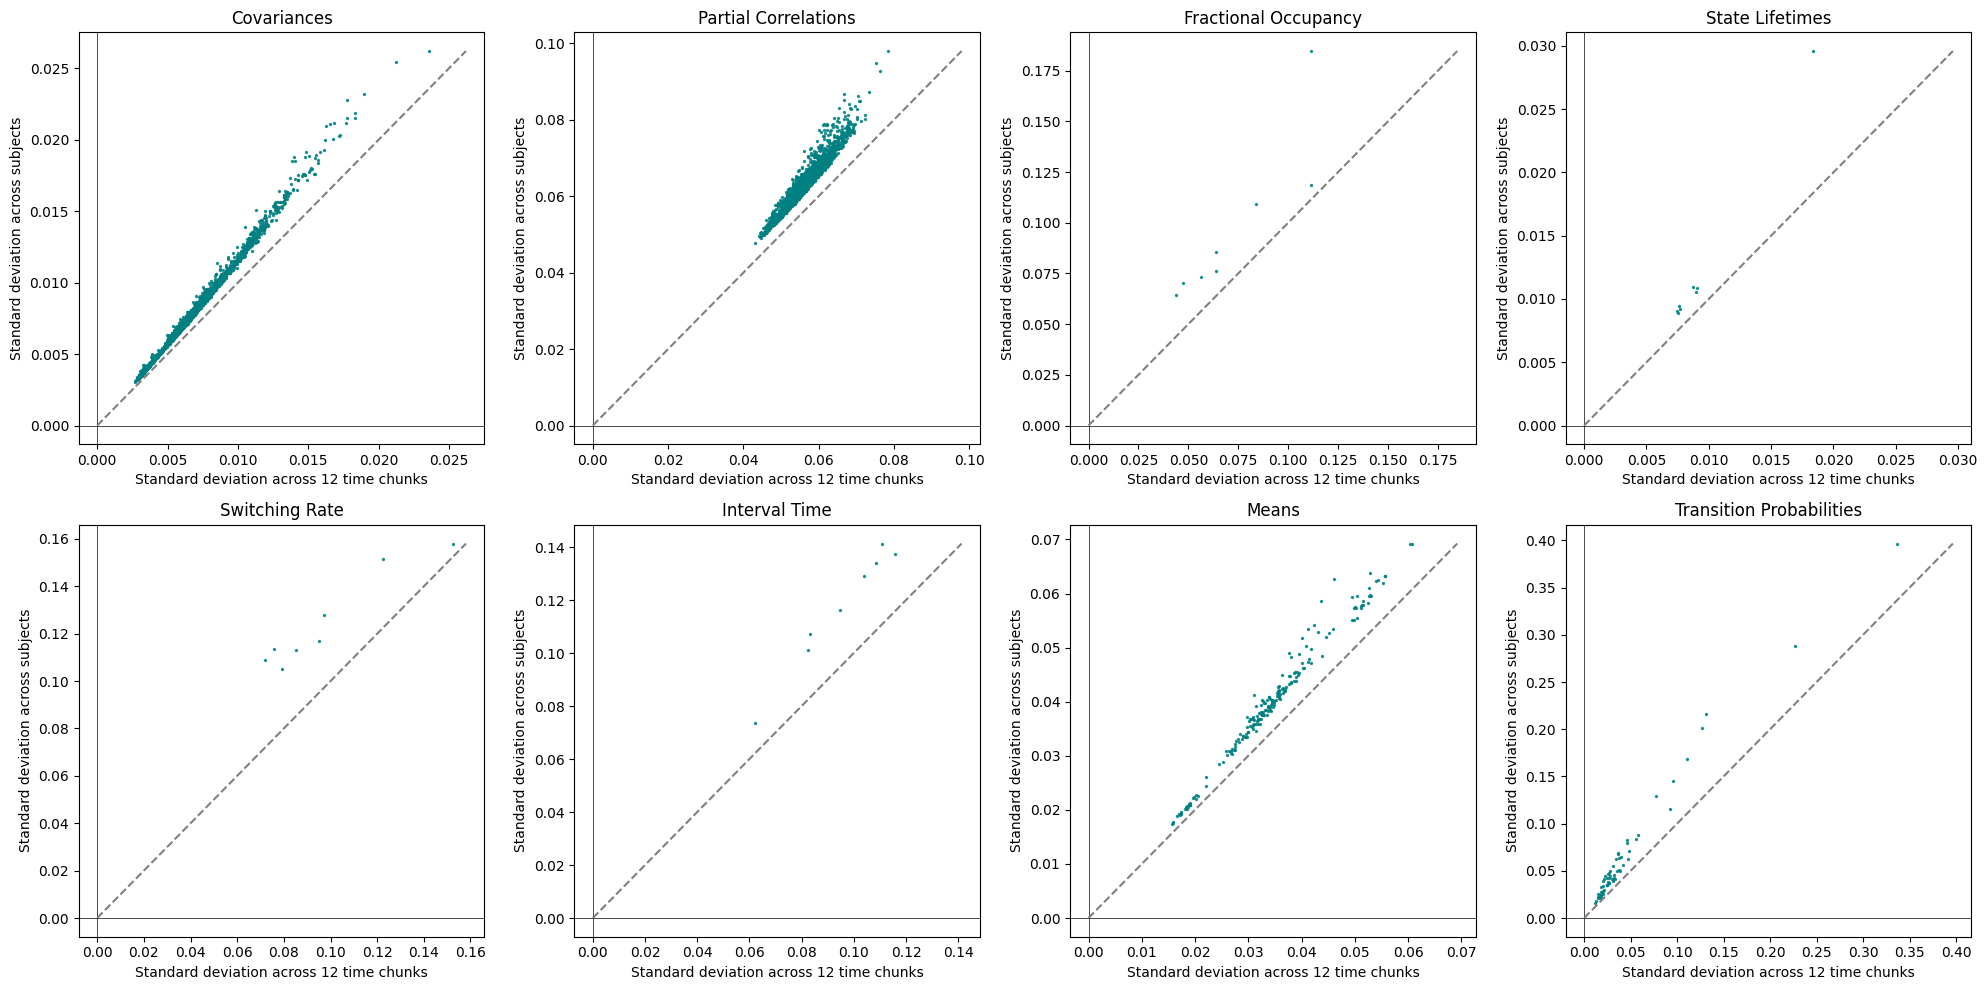

In [11]:
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal']

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes to a 1D array for easy iteration

# Plot each category separately in its own subplot
for ax, chunks, subs, color, label in zip(
        axes,
        [covs_std_mean_chunks_flatten, icovs_std_mean_chunks_flatten, fo_std_mean_chunks,
         lt_std_mean_chunks, sr_std_mean_chunks, intv_std_mean_chunks,
         means_std_mean_chunks_flatten, trans_prob_std_mean_chunks_flatten],
        [covs_std_mean_subs_flatten, icovs_std_mean_subs_flatten, fo_std_mean_subs,
         lt_std_mean_subs, sr_std_mean_subs, intv_std_mean_subs,
         means_std_mean_subs_flatten, trans_prob_std_mean_subs_flatten],
        colors, labels):
    
    ax.scatter(chunks, subs, color=color, alpha=0.8, s=2, label=label)
    
    # Add black lines on x and y axes
    ax.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
    ax.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
    
    # Set subplot title and labels
    ax.set_title(label)
    ax.set_xlabel(f"Standard deviation across {n_chunk} time chunks")
    ax.set_ylabel('Standard deviation across subjects')
    
    # Add y=x line
    ax.plot(np.linspace(0, max(np.nanmax(chunks),np.nanmax(subs)), 100), np.linspace(0, max(np.nanmax(chunks),np.nanmax(subs)), 100), color='grey', linestyle='--')

    # Hide the grid
    ax.grid(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Compute the flattened ratios
covs_plot_flatten = (covs_std_mean_subs / covs_std_mean_chunks).flatten()
icovs_plot_flatten = (icovs_std_mean_subs / icovs_std_mean_chunks).flatten()
fo_plot_flatten = (fo_std_mean_subs / fo_std_mean_chunks).flatten()
lt_plot_flatten = (lt_std_mean_subs / lt_std_mean_chunks).flatten()
sr_plot_flatten = (sr_std_mean_subs / sr_std_mean_chunks).flatten()
intv_plot_flatten = (intv_std_mean_subs / intv_std_mean_chunks).flatten()
means_plot_flatten = (means_std_mean_subs / means_std_mean_chunks).flatten()
trans_prob_plot_flatten = (trans_prob_std_mean_subs / trans_prob_std_mean_chunks).flatten()


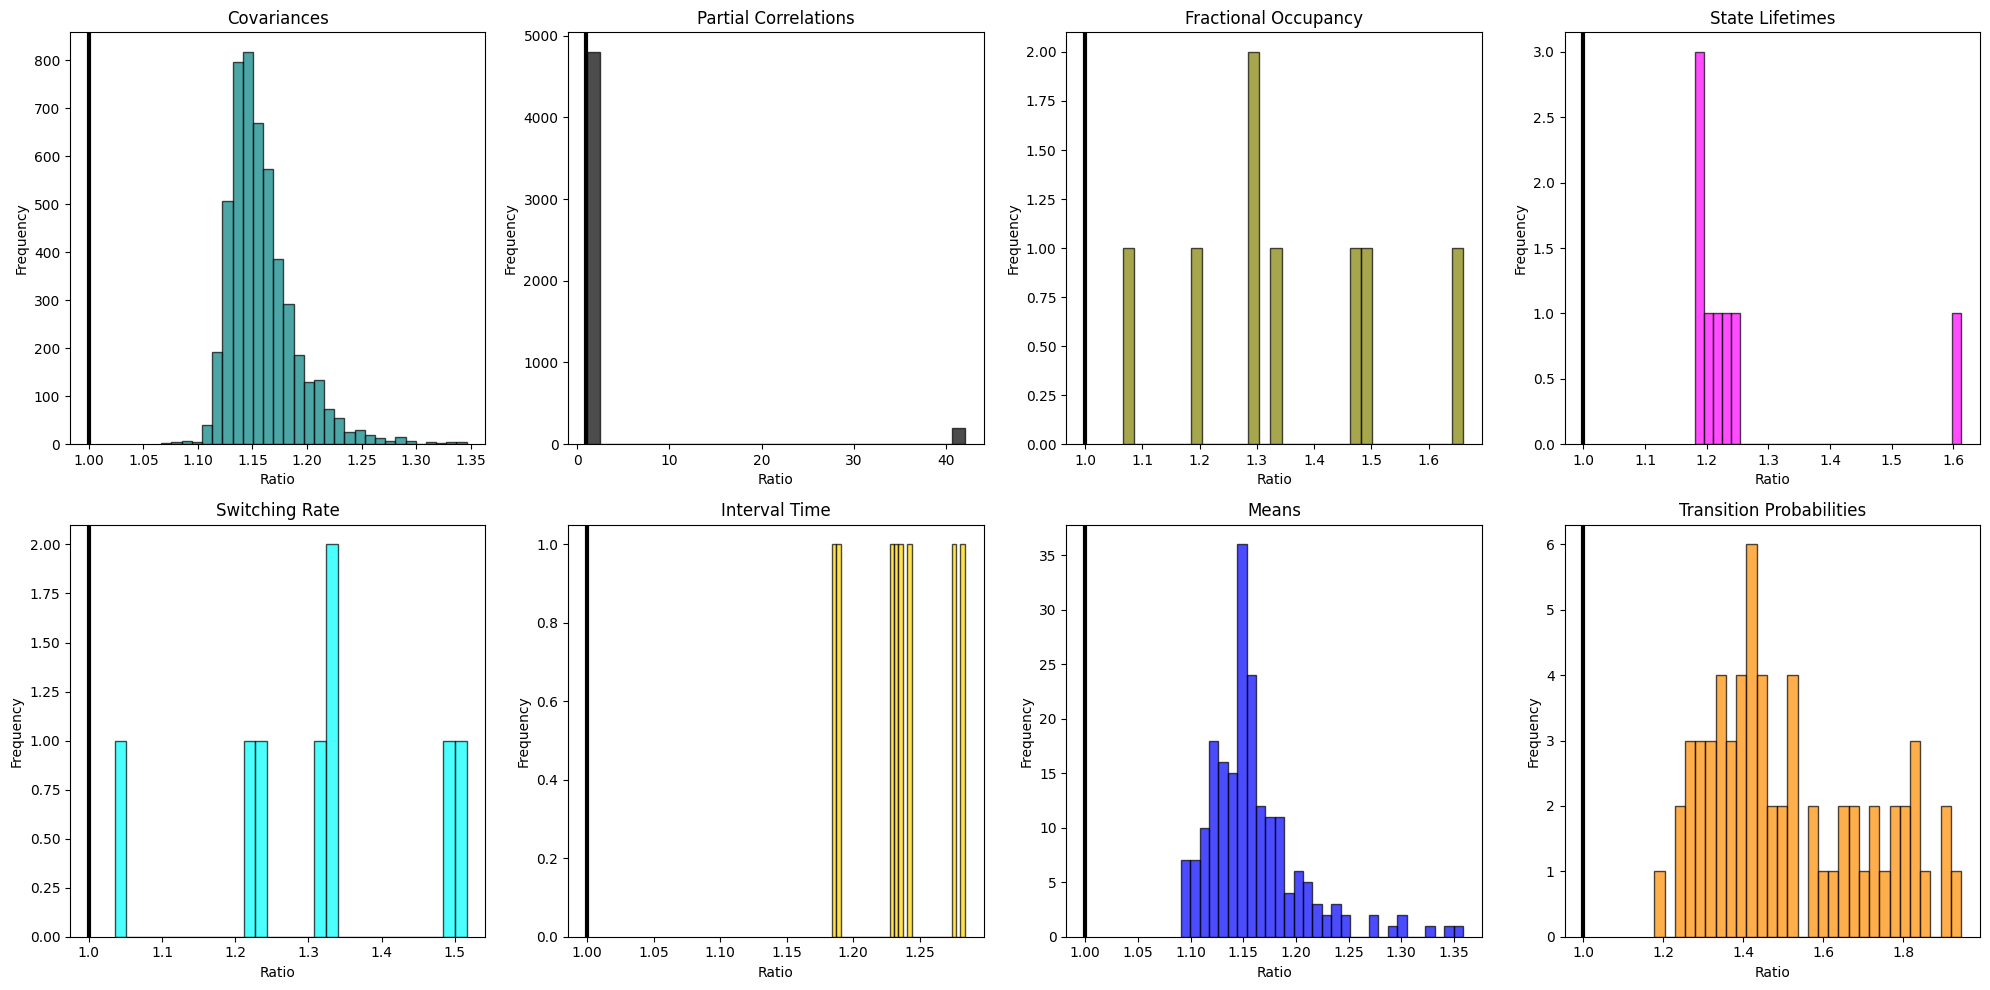

In [14]:

# Define colors and labels for each category
colors = ['teal', 'black', 'olive', 'magenta', 'cyan', 'gold', 'blue', 'darkorange']
labels = [
    'Covariances', 'Partial Correlations', 'Fractional Occupancy', 'State Lifetimes',
    'Switching Rate', 'Interval Time', 'Means', 'Transition Probabilities'
]

# Data to plot
flattened_data = [
    covs_plot_flatten, icovs_plot_flatten, fo_plot_flatten, lt_plot_flatten,
    sr_plot_flatten, intv_plot_flatten, means_plot_flatten, trans_prob_plot_flatten
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes to a 1D array for easy iteration

# Plot each category's distribution separately in its own subplot
for ax, data, color, label in zip(axes, flattened_data, colors, labels):
    ax.hist(data, bins=30, color=color, alpha=0.7, edgecolor='black')  # Adjust bins as needed
    ax.set_title(label)
    ax.set_xlabel('Ratio')
    ax.set_ylabel('Frequency')
    #ax.set_xlim(0, 2)  # Set x-axis limits
    ax.axvline(x=1, color='black', linestyle='-', linewidth=3)
    ax.grid(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()